In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
dataset_kaggle_url = "https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification"
dataset_folder_path = "mobile-price-classification"

In [82]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import io
import json
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import TruePositives, FalsePositives,categorical_accuracy, TrueNegatives, FalseNegatives, Precision, Recall, AUC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
import opendatasets as od
od.download(dataset_kaggle_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaledhoshme
Your Kaggle Key: ··········


100%|██████████| 70.6k/70.6k [00:00<00:00, 15.8MB/s]

In [50]:
train_data = pd.read_csv(os.path.join(dataset_folder_path, "train.csv"))

In [51]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [52]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [53]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f335f3a4c90>,
      dtype=object)

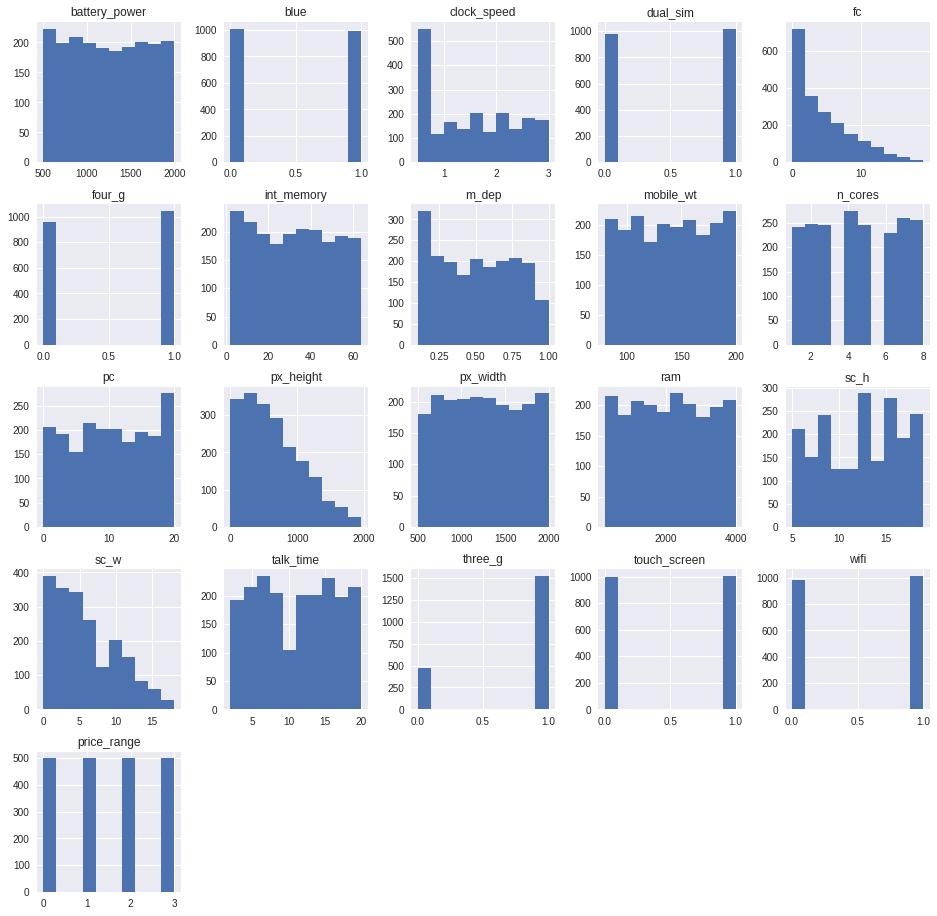

In [54]:
train_data.hist(figsize = (16,16))

In [55]:
len(train_data)

2000

In [56]:
train_data.shape

(2000, 21)

In [57]:
features = train_data.drop(["price_range"], axis=1)
labels = train_data["price_range"]

In [58]:
features.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [59]:
features.shape

(2000, 20)

In [60]:
data = features
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler()


In [61]:
print(scaler.mean_)

[1.2385185e+03 4.9500000e-01 1.5222500e+00 5.0950000e-01 4.3095000e+00
 5.2150000e-01 3.2046500e+01 5.0175000e-01 1.4024900e+02 4.5205000e+00
 9.9165000e+00 6.4510800e+02 1.2515155e+03 2.1242130e+03 1.2306500e+01
 5.7670000e+00 1.1011000e+01 7.6150000e-01 5.0300000e-01 5.0700000e-01]


In [62]:
features = np.asarray(scaler.transform(data))

In [63]:
features.shape

(2000, 20)

In [64]:
features = features.reshape(features.shape[0], features.shape[1], 1)

In [65]:
features.shape

(2000, 20, 1)

In [66]:
labels = to_categorical(labels, 4)

In [67]:
labels.shape

(2000, 4)

In [68]:
train_data["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [246]:
m = Sequential()
m.add(Input(shape=(features.shape[1], 1)))
m.add(tf.keras.layers.Flatten())
m.add(Dense(64,activation="LeakyReLU", 
             activity_regularizer = tf.keras.regularizers.L2(0.001))) 
m.add(Dropout(0.7))
m.add(Dense(4, activation="softmax",
             activity_regularizer = tf.keras.regularizers.L2(0.001)))

In [247]:
m.compile(loss="categorical_crossentropy", optimizer='adam',metrics=[TruePositives(name='tp'),
                                                                     FalsePositives(name='fp'),
                                                                     TrueNegatives(name='tn'),
                                                                     FalseNegatives(name='fn'),
                                                                     "accuracy",
                                                                     Precision(name='precision'),
                                                                     Recall(name='recall')])

In [248]:
m.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 20)                0         
                                                                 
 dense_25 (Dense)            (None, 64)                1344      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 4)                 260       
                                                                 
Total params: 1,604
Trainable params: 1,604
Non-trainable params: 0
_________________________________________________________________


In [249]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'val_loss', patience = 120, mode = 'min', restore_best_weights = True)

In [250]:
labels

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [251]:
labels.shape

(2000, 4)

In [252]:
features.shape

(2000, 20, 1)

In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.1)

In [254]:
history_training = m.fit(X_train, Y_train, epochs=800,
                         validation_data = (X_test, Y_test), batch_size=32, callbacks=[ earlyStopping])

Epoch 1/800
57/57 [==============================] - 3s 19ms/step - loss: 1.7198 - tp: 259.0000 - fp: 668.0000 - tn: 4732.0000 - fn: 1541.0000 - accuracy: 0.2761 - precision: 0.2794 - recall: 0.1439 - val_loss: 1.2738 - val_tp: 11.0000 - val_fp: 5.0000 - val_tn: 595.0000 - val_fn: 189.0000 - val_accuracy: 0.4200 - val_precision: 0.6875 - val_recall: 0.0550
Epoch 2/800
57/57 [==============================] - 0s 6ms/step - loss: 1.4458 - tp: 320.0000 - fp: 470.0000 - tn: 4930.0000 - fn: 1480.0000 - accuracy: 0.3467 - precision: 0.4051 - recall: 0.1778 - val_loss: 1.1259 - val_tp: 35.0000 - val_fp: 1.0000 - val_tn: 599.0000 - val_fn: 165.0000 - val_accuracy: 0.5600 - val_precision: 0.9722 - val_recall: 0.1750
Epoch 3/800
57/57 [==============================] - 0s 6ms/step - loss: 1.3151 - tp: 401.0000 - fp: 427.0000 - tn: 4973.0000 - fn: 1399.0000 - accuracy: 0.4183 - precision: 0.4843 - recall: 0.2228 - val_loss: 1.0185 - val_tp: 47.0000 - val_fp: 2.0000 - val_tn: 598.0000 - val_fn: 15

In [266]:
m.evaluate(X_test, Y_test, batch_size = 32)

7/7 [==============================] - 0s 5ms/step - loss: 0.0855 - tp: 195.0000 - fp: 5.0000 - tn: 595.0000 - fn: 5.0000 - accuracy: 0.9750 - precision: 0.9750 - recall: 0.9750  


[0.08550973981618881,
 195.0,
 5.0,
 595.0,
 5.0,
 0.9750000238418579,
 0.9750000238418579,
 0.9750000238418579]

In [267]:
import matplotlib as mpl
def draw_plot(data,data2, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (20, 5))
  plt.plot(data,'darkblue', label= type_data[0])
  plt.plot(data2,'darkorange', label= type_data[1])
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

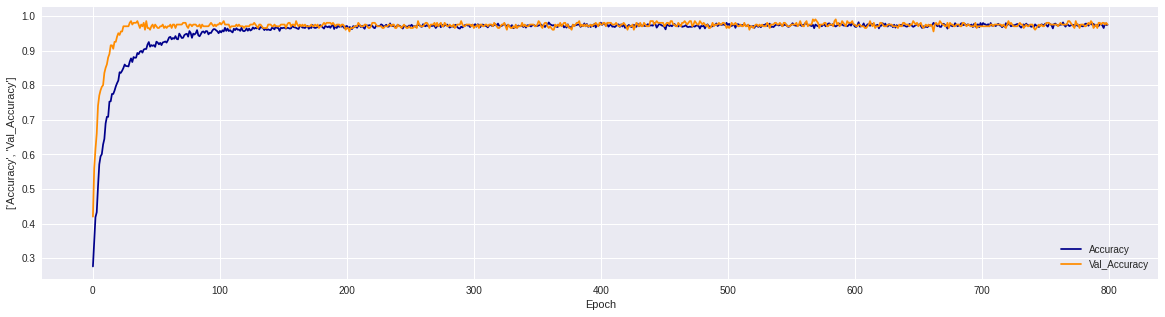

In [276]:
draw_plot(history_training.history['accuracy'],
          history_training.history['val_accuracy'],
          ['Accuracy', 'Val_Accuracy'] )

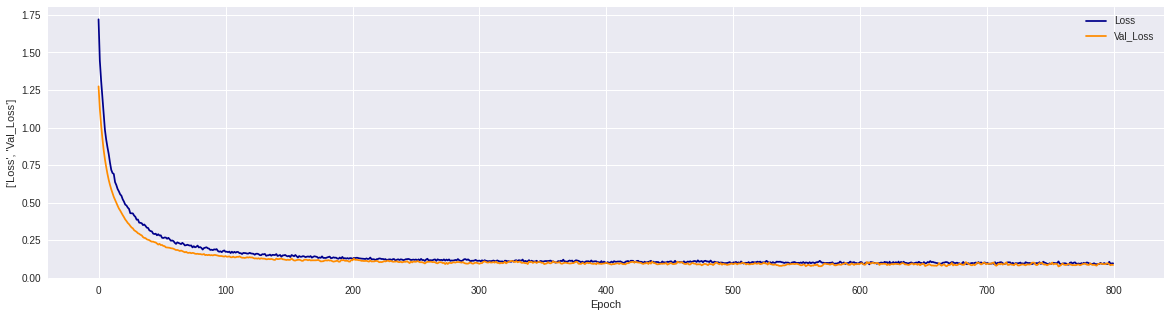

In [275]:
draw_plot(history_training.history['loss'],
          history_training.history['val_loss'],
          ['Loss', 'Val_Loss'] )

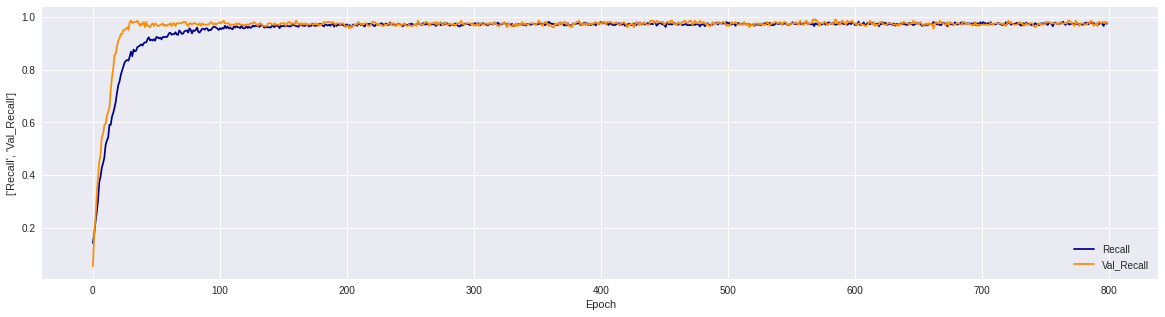

In [274]:
draw_plot(history_training.history['recall'],
          history_training.history['val_recall'],
          ['Recall', 'Val_Recall'] )

In [259]:
y_pred = m.predict(X_test,batch_size=32)

In [260]:
y_pred = np.argmax(y_pred, axis = 1)

In [261]:
y_pred

array([3, 1, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 1, 3, 0, 0, 0, 3, 1, 3, 2,
       0, 0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 2, 3, 0, 3, 1, 2, 0, 3, 1, 3,
       3, 0, 1, 0, 0, 0, 2, 3, 2, 2, 1, 0, 3, 1, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 2, 3, 0, 3, 1, 1, 1, 3, 3, 2, 1, 1, 0, 3, 0, 0, 0, 2, 2, 3, 3,
       1, 1, 0, 0, 0, 3, 3, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 3, 1, 0,
       1, 0, 0, 0, 1, 3, 1, 3, 3, 0, 2, 0, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1,
       1, 0, 1, 3, 0, 0, 3, 0, 2, 3, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 3, 3,
       3, 3, 2, 1, 0, 0, 3, 0, 3, 0, 2, 2, 1, 0, 0, 1, 0, 3, 2, 1, 3, 2,
       0, 2, 0, 3, 0, 3, 1, 3, 1, 3, 1, 2, 0, 3, 1, 3, 3, 1, 0, 0, 0, 1,
       0, 1])

In [262]:
y_test = np.argmax(Y_test, axis = 1)

In [263]:
y_test

array([3, 1, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 1, 3, 0, 0, 0, 3, 1, 3, 2,
       0, 0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 1, 2, 3, 0, 3, 1, 2, 0, 3, 1, 3,
       3, 0, 1, 0, 0, 0, 2, 3, 2, 2, 0, 0, 3, 1, 1, 0, 0, 2, 0, 1, 1, 2,
       3, 3, 3, 0, 3, 1, 1, 1, 3, 3, 2, 1, 1, 0, 3, 0, 0, 0, 2, 2, 3, 3,
       1, 1, 0, 0, 0, 3, 3, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 3, 1, 0,
       1, 0, 0, 0, 1, 3, 1, 3, 3, 0, 2, 0, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1,
       1, 0, 1, 3, 0, 0, 3, 0, 2, 3, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 3, 3,
       3, 3, 2, 1, 0, 0, 3, 0, 3, 0, 2, 2, 1, 0, 0, 1, 0, 3, 2, 1, 3, 2,
       0, 2, 0, 3, 0, 3, 1, 3, 1, 3, 1, 2, 0, 3, 2, 3, 3, 1, 0, 0, 0, 1,
       0, 1])

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.975

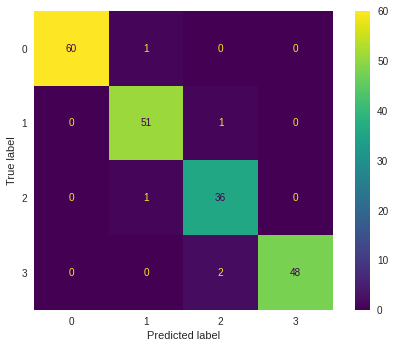

In [265]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2, 3])
disp.plot()
plt.grid(b=None)
plt.show()